<a href="https://colab.research.google.com/github/marelycarcamo/Challenge1-Tiendas/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


Iterar sobre los archivos csv para visualizar las columnas.

In [ ]:
for df in [tienda1, tienda2, tienda3, tienda4]:
    print(df.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [ ]:
tienda1.info()
tienda2.info()
tienda3.info()
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
 12  Tienda                  2359 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 239.7+ KB
<class 'pandas.core.frame.DataFram

In [ ]:
# Creamos una columna 'Tienda', para el identificador de tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenamos las tiendas en un único dataframe.
df_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
df_tiendas

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,Tienda 1
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,Tienda 1
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,Tienda 1
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,Tienda 1
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,"227,700.00","12,600.00",12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25,-75.56,Tienda 4
9431,Silla de oficina,Muebles,"342,000.00","18,600.00",17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.13,-73.12,Tienda 4
9432,Vaso térmico,Deportes y diversión,"36,700.00","2,400.00",03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.61,-74.08,Tienda 4
9433,Set de ollas,Artículos para el hogar,"151,800.00","8,300.00",15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.44,-76.52,Tienda 4


In [99]:
#Remplazo de acentos en nombre de columnas
df_tiendas.columns = df_tiendas.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u').str.replace('ñ', 'n')
df_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   producto                9435 non-null   object        
 1   categoria_del_producto  9435 non-null   object        
 2   precio                  9435 non-null   float64       
 3   costo_de_envio          9435 non-null   float64       
 4   fecha_de_compra         9435 non-null   datetime64[ns]
 5   vendedor                9435 non-null   object        
 6   lugar_de_compra         9435 non-null   object        
 7   calificacion            9435 non-null   int64         
 8   metodo_de_pago          9435 non-null   object        
 9   cantidad_de_cuotas      9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64       
 12  tienda                  9435 non-null   category

In [100]:

df_tiendas['fecha_de_compra'] = pd.to_datetime(df_tiendas['fecha_de_compra'])
categoricas = ['producto', 'categoria_del_producto', 'vendedor', 'lugar_de_compra', 'metodo_de_pago','tienda']
for col in categoricas:
    df_tiendas[col] = df_tiendas[col].astype('category')

df_tiendas.dtypes


,0
producto,category
categoria_del_producto,category
precio,float64
costo_de_envio,float64
fecha_de_compra,datetime64[ns]
vendedor,category
lugar_de_compra,category
calificacion,int64
metodo_de_pago,category
cantidad_de_cuotas,int64


In [101]:
# Normalización para reducir inconsistencias. Eliminamos espacios en blanco y estardarizar uso de mayúsculas y minúsculas
df_tiendas['producto'] = df_tiendas['producto'].str.strip().str.lower()
df_tiendas['categoria_del_producto'] = df_tiendas['categoria_del_producto'].str.strip().str.lower()
df_tiendas['vendedor'] = df_tiendas['vendedor'].str.strip().str.title()
df_tiendas['lugar_de_compra'] = df_tiendas['lugar_de_compra'].str.strip().str.title()
df_tiendas['metodo_de_pago'] = df_tiendas['metodo_de_pago'].str.strip().str.lower()

df_tiendas

,producto,categoria_del_producto,precio,costo_de_envio,fecha_de_compra,vendedor,lugar_de_compra,calificacion,metodo_de_pago,cantidad_de_cuotas,lat,lon,tienda
0,asistente virtual,electrónicos,"164,300.00","6,900.00",2021-01-16,Pedro Gomez,Bogotá,4,tarjeta de crédito,8,4.61,-74.08,Tienda 1
1,mesa de comedor,muebles,"192,300.00","8,400.00",2022-05-18,Beatriz Morales,Medellín,1,tarjeta de crédito,4,6.25,-75.56,Tienda 1
2,juego de mesa,juguetes,"209,600.00","15,900.00",2021-03-15,Juan Fernandez,Cartagena,1,tarjeta de crédito,1,10.40,-75.51,Tienda 1
3,microondas,electrodomésticos,"757,500.00","41,000.00",2022-05-03,Juan Fernandez,Cali,4,nequi,1,3.44,-76.52,Tienda 1
4,silla de oficina,muebles,"335,200.00","20,200.00",2020-11-07,Maria Alfonso,Medellín,5,nequi,1,6.25,-75.56,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,mesa de comedor,muebles,"227,700.00","12,600.00",2020-02-12,Camila Rivera,Medellín,5,tarjeta de crédito,1,6.25,-75.56,Tienda 4
9431,silla de oficina,muebles,"342,000.00","18,600.00",2022-05-17,Felipe Santos,Bucaramanga,5,tarjeta de crédito,3,7.13,-73.12,Tienda 4
9432,vaso térmico,deportes y diversión,"36,700.00","2,400.00",2022-05-03,Camila Rivera,Bogotá,5,tarjeta de crédito,1,4.61,-74.08,Tienda 4
9433,set de ollas,artículos para el hogar,"151,800.00","8,300.00",2020-06-15,Blanca Ramirez,Cali,5,tarjeta de crédito,1,3.44,-76.52,Tienda 4


In [102]:
#Verificar si hay duplicados
df_tiendas.duplicated().sum() # np.int64(0) En este caso no hay duplicados

np.int64(0)

In [103]:
# Verificar si hay valores nulos
df_tiendas.isnull().sum()  # No hay valores nulos

,0
producto,0
categoria_del_producto,0
precio,0
costo_de_envio,0
fecha_de_compra,0
vendedor,0
lugar_de_compra,0
calificacion,0
metodo_de_pago,0
cantidad_de_cuotas,0


In [104]:
# Mostrar las categorías
df_tiendas['categoria_del_producto'].value_counts()

,count
categoria_del_producto,
muebles,1886
electrónicos,1772
juguetes,1290
electrodomésticos,1149
deportes y diversión,1113
instrumentos musicales,753
libros,742
artículos para el hogar,730


In [ ]:
# Mostrar los productos
df_tiendas['vendedor'].value_counts()

,count
Vendedor,
Izabela De León,744
Felipe Santos,701
Juan Fernandez,694
Ángel Rodriguez,684
Blanca Ramirez,679
Maria Alfonso,679
Juliana Costa,677
Lucas Olivera,674
Camila Rivera,667


In [ ]:
# Mostrar los productos
df_tiendas['lugar_de_compra'].value_counts()

,count
Lugar de Compra,
Bogotá,3943
Medellín,2314
Cali,1007
Pereira,517
Barranquilla,310
Cartagena,242
Cúcuta,186
Bucaramanga,181
Riohacha,163


In [ ]:
# Mostrar los productos
df_tiendas['metodo_de_pago'].value_counts()

,count
Método de pago,
tarjeta de crédito,6898
nequi,1900
cupón,504
tarjeta de débito,133


#1. Análisis de facturación



In [134]:
# Cambiamos la configuración de Panda para tener los resultados con formato estándar.
pd.set_option('display.float_format', '{:,.2f}'.format)


# En este primer análisis, calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

df_facturacion = df_tiendas.groupby('tienda',observed=True)['precio'].sum()
df_facturacion = df_facturacion.reset_index()
df_facturacion

,tienda,precio
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


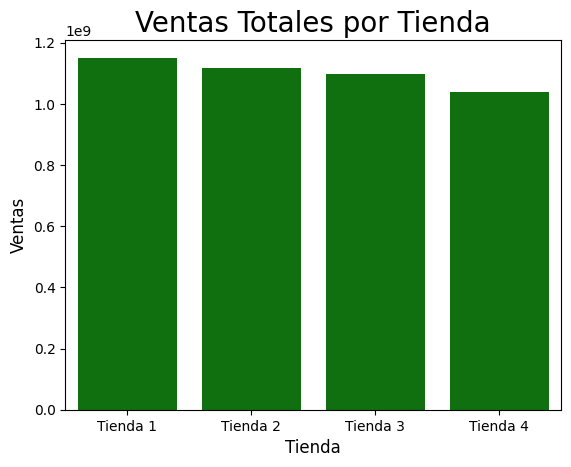

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_facturacion, x='tienda',y='precio', color='green')
plt.title('Ventas Totales por Tienda',fontsize=20)
plt.xlabel('Tienda',fontsize=12)
plt.ylabel('Ventas',fontsize=12)
plt.show()


# 2. Ventas por categoría

In [132]:
# Calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

df_categorias = df_tiendas.groupby(['tienda', 'categoria_del_producto'],observed=True)['categoria_del_producto'].count()
df_categorias = df_categorias.unstack()


df_categorias



categoria_del_producto,artículos para el hogar,deportes y diversión,electrodomésticos,electrónicos,instrumentos musicales,juguetes,libros,muebles
tienda,,,,,,,,
Tienda 1,171,284,312,448,182,324,173,465
Tienda 2,181,275,305,422,224,313,197,442
Tienda 3,177,277,278,451,177,315,185,499
Tienda 4,201,277,254,451,170,338,187,480


In [ ]:
# Con el dataframe df_categorias, obtener: tienda, la categoría con la máxima cantidad y el monto máximo asociado
df_categorias_max = df_categorias.idxmax(axis=1)
df_categorias_max = df_categorias_max.reset_index()
df_categorias_max


,tienda,0
0,Tienda 1,muebles
1,Tienda 2,muebles
2,Tienda 3,muebles
3,Tienda 4,muebles


# 3. Calificación promedio de la tienda


In [131]:
#calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

df_calificacion = df_tiendas.groupby('tienda',observed=True)['calificacion'].mean()
df_calificacion = df_calificacion.reset_index()
df_calificacion

,tienda,calificacion
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


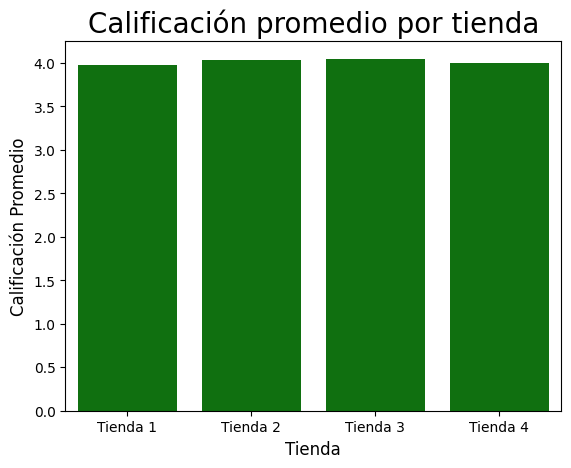

In [128]:
sns.barplot(data=df_calificacion,color='green')
plt.title('Calificación promedio por tienda',fontsize=20)
plt.xlabel('Tienda')
plt.xlabel('Tienda',fontsize=12)
plt.ylabel('Calificación Promedio',fontsize=12)
plt.show()

# 4. Productos más y menos vendidos

In [127]:
# Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.
df_productos = df_tiendas.groupby('tienda',observed=True)['producto'].value_counts().reset_index(name='cantidad')
df_productos


,tienda,producto,cantidad
0,Tienda 1,armario,60
1,Tienda 1,microondas,60
2,Tienda 1,tv led uhd 4k,60
3,Tienda 1,secadora de ropa,58
4,Tienda 1,bloques de construcción,56
...,...,...,...
199,Tienda 4,lavadora de ropa,38
200,Tienda 4,refrigerador,38
201,Tienda 4,guitarra acústica,37
202,Tienda 4,armario,34


In [ ]:
# Obtener el producto más vendido por tienda
top_productos = df_productos.sort_values(['tienda', 'cantidad'], ascending=[True, False]).drop_duplicates('tienda', keep='first')
tpp = top_productos.rename(columns={'Producto': 'Producto más vendido'})
tpp

,tienda,producto,cantidad
0,Tienda 1,armario,60
51,Tienda 2,iniciando en programación,65
102,Tienda 3,kit de bancas,57
153,Tienda 4,cama box,62


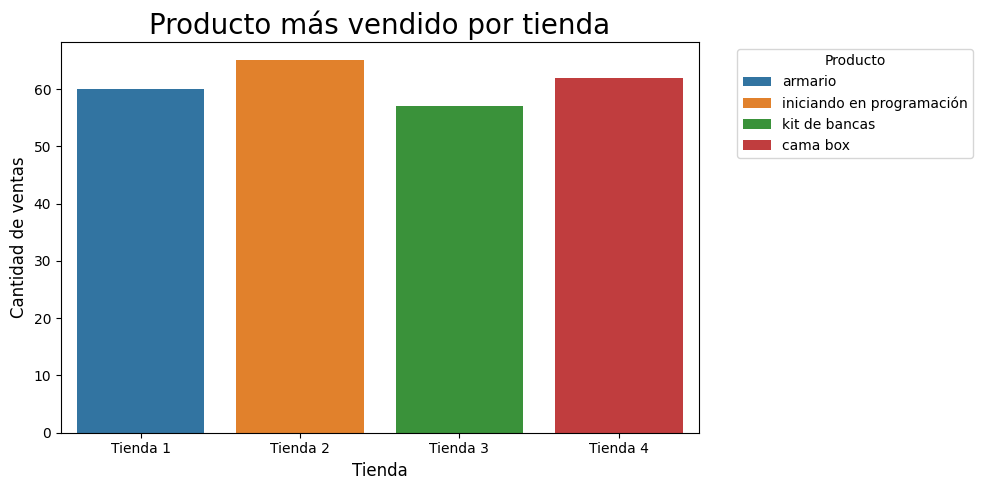

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=tpp, x='tienda', y='cantidad', hue='producto')
plt.title('Producto más vendido por tienda',fontsize=20)
plt.ylabel('Cantidad de ventas',fontsize=12)
plt.xlabel('Tienda',fontsize=12)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Obtener el producto menos vendido por tienda
low_productos = df_productos.sort_values(['tienda', 'cantidad'], ascending=[True, True]).drop_duplicates('tienda', keep='first')
lpp = low_productos.rename(columns={'Producto': 'Producto menos vendido'})
lpp

,tienda,producto,cantidad
49,Tienda 1,auriculares con micrófono,33
101,Tienda 2,juego de mesa,32
152,Tienda 3,bloques de construcción,35
203,Tienda 4,guitarra eléctrica,33


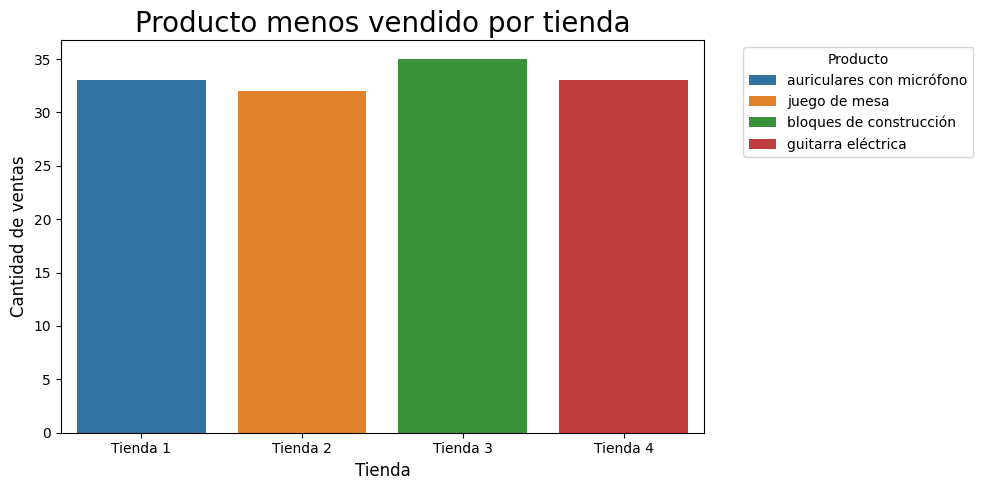

In [ ]:
#Gráfico de barras, x=tiendas, y=cantidad productos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=lpp, x='tienda', y='cantidad', hue='producto')
plt.title('Producto menos vendido por tienda',fontsize=20)
plt.ylabel('Cantidad de ventas',fontsize=12)
plt.xlabel('Tienda',fontsize=12)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [126]:
df_envio_promedio = df_tiendas.groupby('tienda',observed=True)['costo_de_envio'].mean()
df_envio_promedio = df_envio_promedio.reset_index()
df_envio_promedio

,tienda,costo_de_envio
0,Tienda 1,"26,018.61"
1,Tienda 2,"25,216.24"
2,Tienda 3,"24,805.68"
3,Tienda 4,"23,459.46"


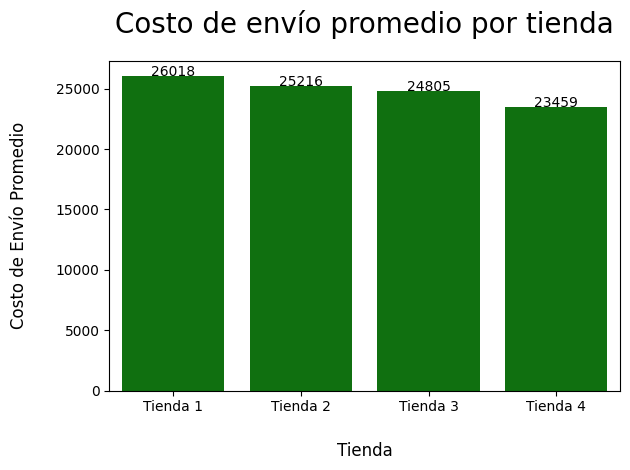

In [125]:
sns.barplot(data=df_envio_promedio, x='tienda', y='costo_de_envio',color= 'green')
plt.title('Costo de envío promedio por tienda',fontsize=20, pad=20)
plt.xlabel('Tienda')
plt.xlabel('Tienda',fontsize=12,labelpad=20)
plt.ylabel('Costo de Envío Promedio',fontsize=12, labelpad=20)

# Mostrar valores encima de cada barra
for i, valor in enumerate(df_envio_promedio['costo_de_envio']):
    plt.text(i, valor + 1, str(int(valor)), ha='center', fontsize=10)

# Ajustar márgenes
plt.tight_layout()
plt.show()